<h1 style="color:Indigo">Fraud Detection</h1>

<h1 style="color:Indigo">Business Case:</h1>

The financial industry faces a growing challenge in combating fraudulent transactions, which can lead to substantial financial losses and tarnish the reputation of financial institutions. As a financial company, our primary objective is to proactively detect and prevent fraudulent activities to safeguard our customers' interests and preserve the company's integrity.

<h1 style="color:Indigo">Dataset Description:</h1>

We have obtained a comprehensive dataset in CSV format, containing 6,362,620 records of financial transactions. The dataset comprises 10 essential attributes, including transaction type, amount, customer details (origination and destination), and a binary label indicating whether a transaction is fraudulent or legitimate

<h1 style="color:Indigo">Objective:</h1>

Our main objective is to develop an advanced fraud detection model using data science and machine learning techniques. This model should accurately predict whether a transaction is fraudulent or legitimate, enabling us to identify suspicious activities in real-time and take immediate action to prevent financial harm.

<h1 style="color:indigo"> Reading the data</h1>

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

<h1 style="color:Indigo"> Basic Checks</h1>

In [5]:
# previewing the first five rows
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# previewing the last five rows
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
# previewing number of rows and columns
data.shape

(6362620, 11)

In [8]:
#To check  data type and  null value of all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
# previewing summary statistics of columns
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
#checking info about categorical data/columns
data.describe(include="O")

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [11]:
# checking for missing values
missing = data.isna().sum().to_frame()
missing

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [12]:
# Checking for the presence of unique values to categorize the data variables into numeric and categorical variables
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

 <b>There is lot of null value present in our dataset</b>

<h1 style="color:Indigo"> Data Description</h1>
 
The dataset contains information related to fraudulent transactions in a financial company. It is divided into two parts: the training set features and the training set labels. The total training data consists of 26,707 rows and 36 columns. Each column in the dataset represents a specific feature or attribute, and the information contained within the columns is as follows:
1.`step` - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

2.`type` - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

3.`amount` - amount of the transaction in local currency.

4.`nameOrig` - customer who started the transaction

5.`oldbalanceOrg` - initial balance before the transaction

6.`newbalanceOrig` - new balance after the transaction

7.`nameDest` - customer who is the recipient of the transaction

8.`oldbalanceDest` - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

9.`newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

10.`isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

11.`isFlaggedFraud` - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

<h1 style="color:Indigo"> Exploratory Data Analysis</h1>


This section mainly explores the distribution of some features

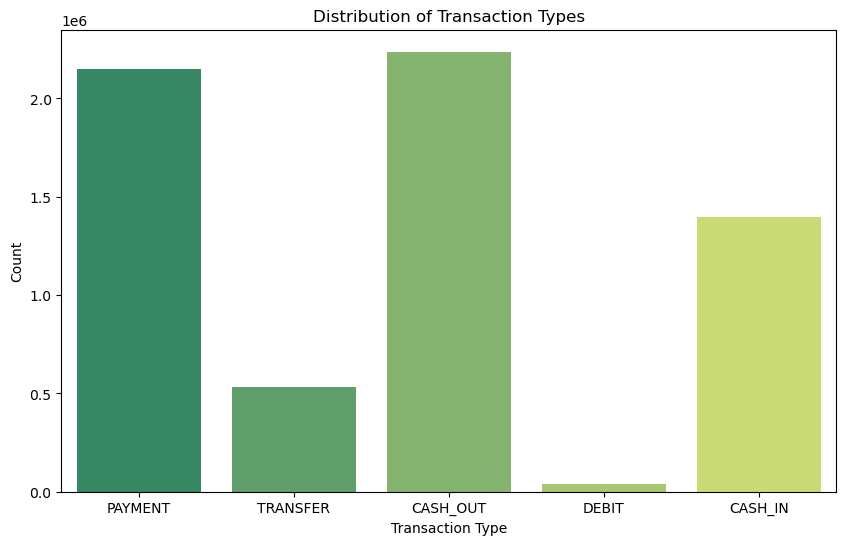

In [13]:
# Check the distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data, palette="summer")
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

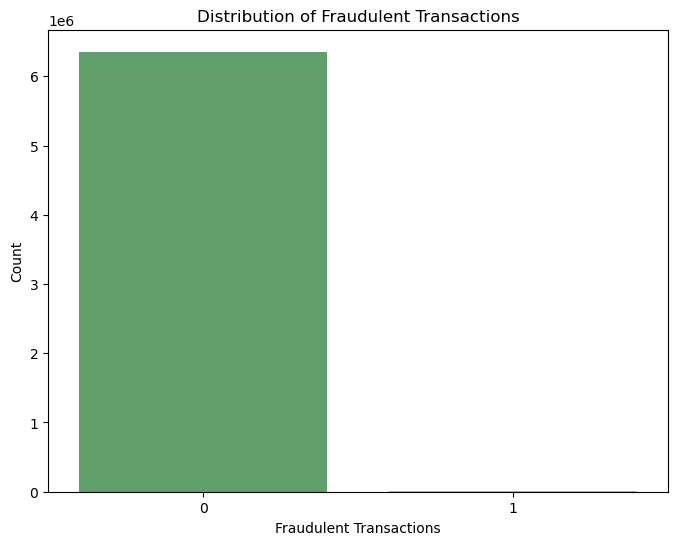

In [14]:
# Check the distribution of the target variable 'isFraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=data, palette="summer")
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [15]:
legit = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


<h3 style="color:Indigo">Data Insights</h3>

* Most of the transactions in the dataset are either "Payment" or "Cash Out," while the "Debit" transaction type is much less common.
* The majority of transactions (99.8709%) are legitimate and only a small fraction being fraudulent (0.1291%), indicating a significant class imbalance.

In [16]:
X = data[data['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


<h3 style="color:Indigo">Data Insights</h3>

* For merchant accounts, the attributes `oldbalanceDest` and `newbalanceDest` do not contain any information, as indicated by the absence of data in these columns. These attributes are not applicable to merchant accounts and are likely left blank or not provided in the dataset

<h2 style="color:Indigo">CORRELATION HEATMAP</h2>

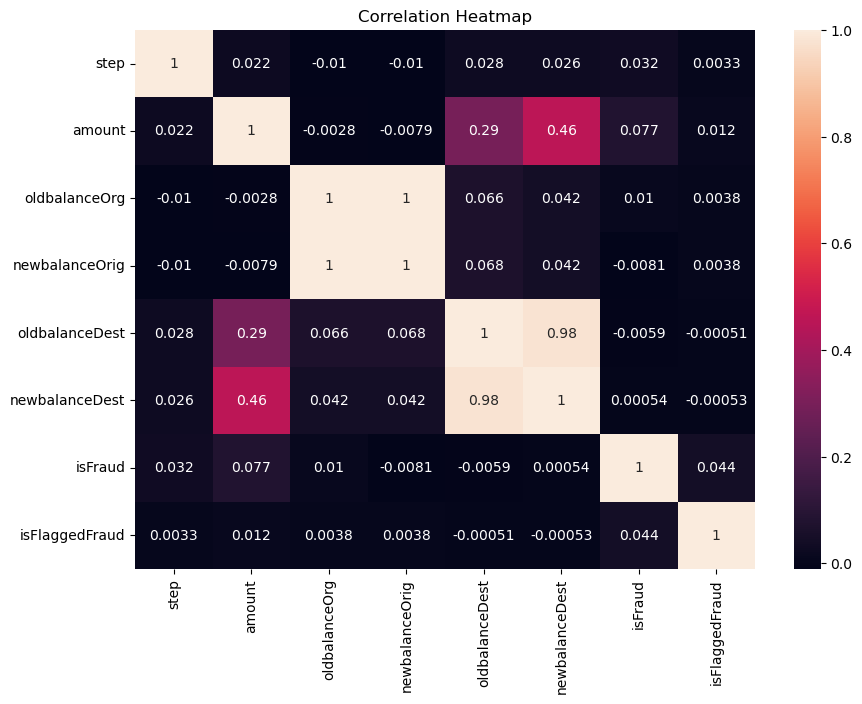

In [17]:
# Check correlation between numeric features using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()



<h1 style="color:Indigo"> Data Preprocessing</h1>


In [18]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

This is a really big dataset with no NULL values 

<h1 style="color:Indigo">Label Encoding</h1>


In [19]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame with 'object' data type (categorical variables)
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

# Now, the categorical variables have been encoded with numerical labels

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [21]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


Now, after label encoding, we can observe that the previously categorical features have been transformed into numerical format, allowing us to work with continuous and numerical data throughout the dataset.

In [22]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

calc_vif(data)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [23]:
data['Actual_amount_orig'] = data.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
data['Actual_amount_dest'] = data.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
data['TransactionPath'] = data.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
data = data.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(data)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

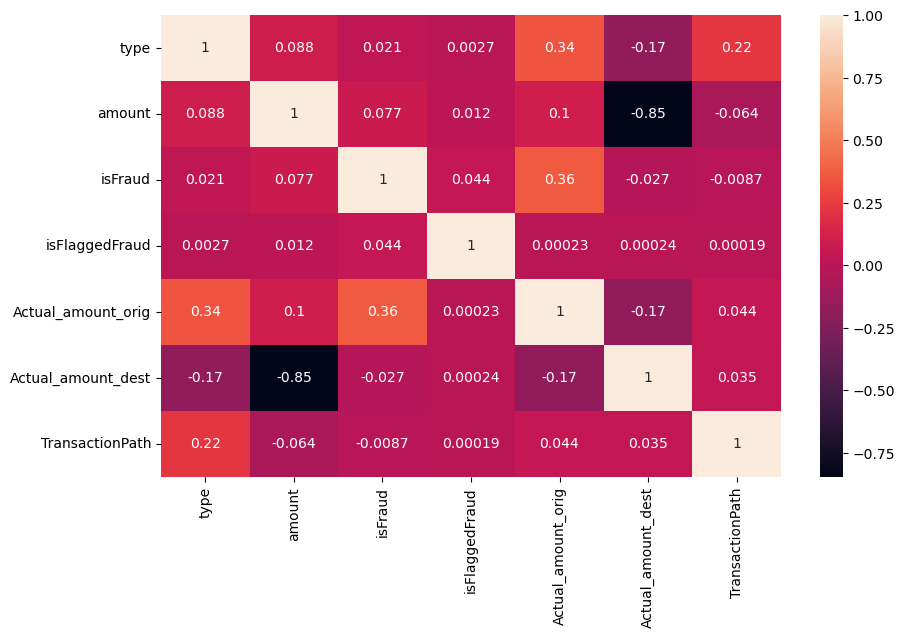

In [24]:
corr=data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)


<b>How did you select variables to be included in the model?</b>
    
    
Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

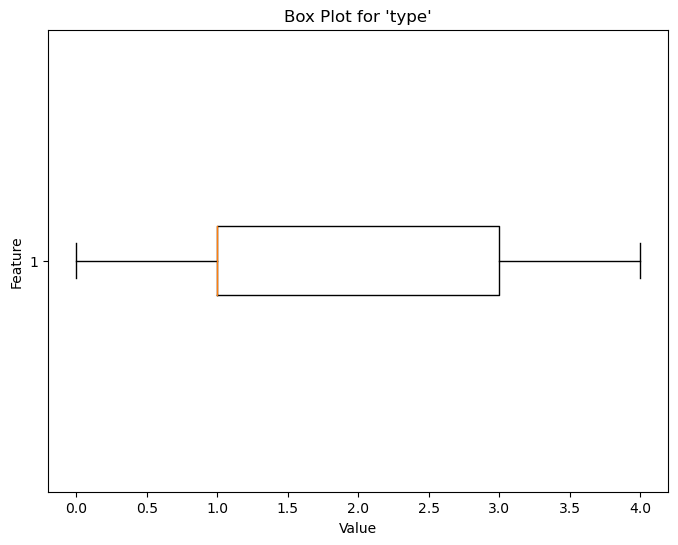

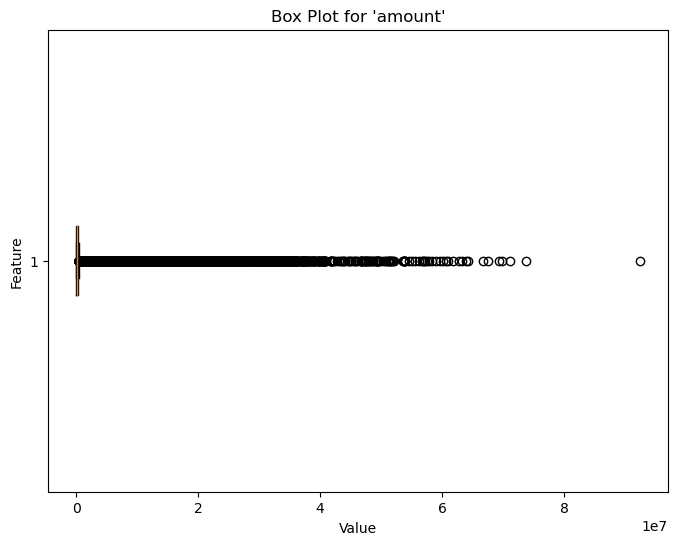

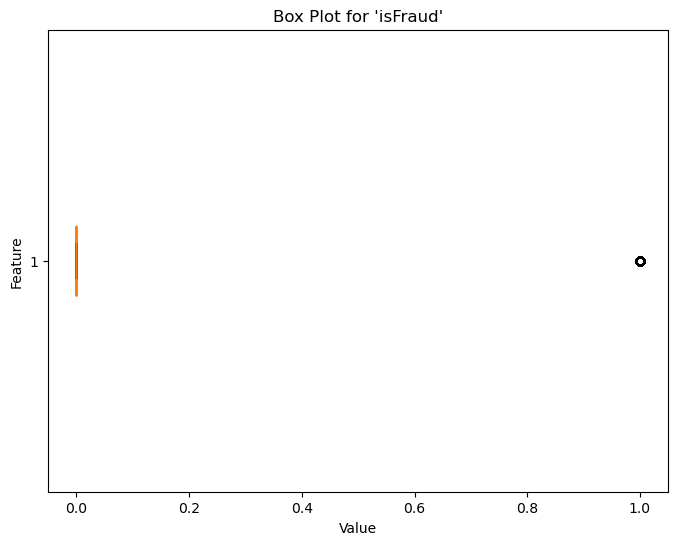

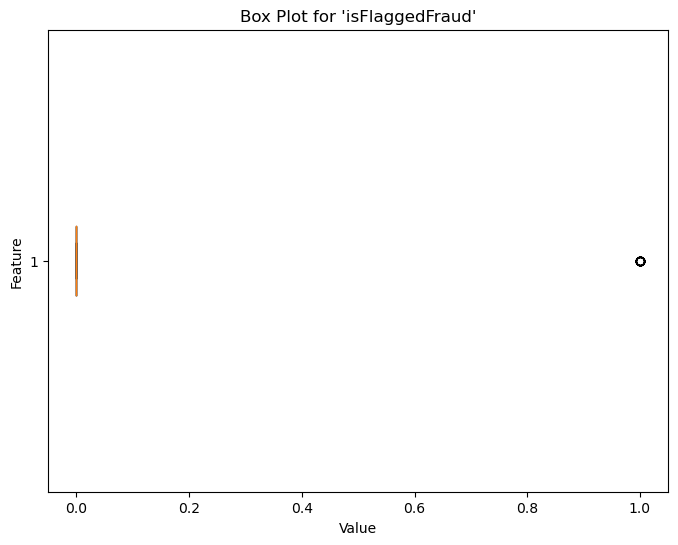

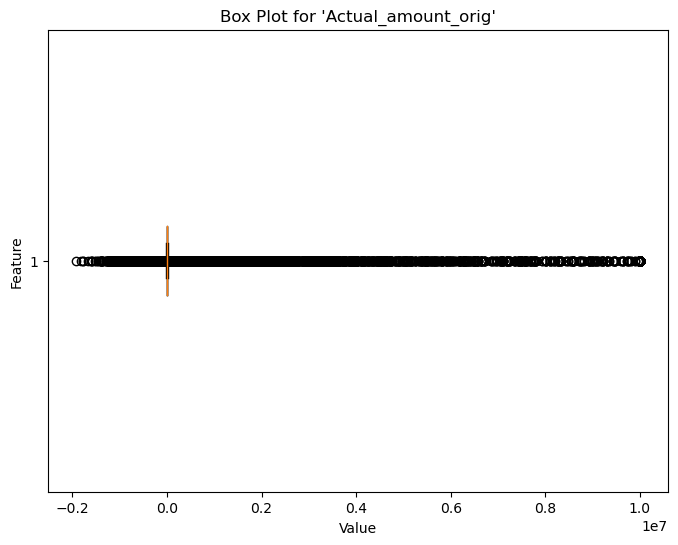

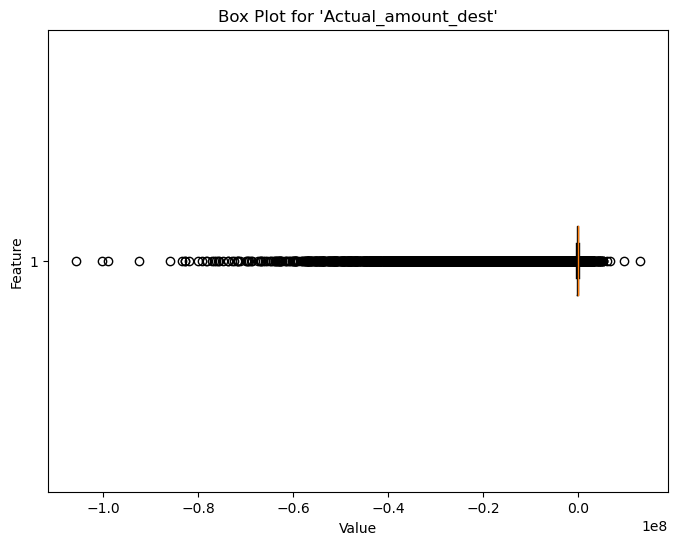

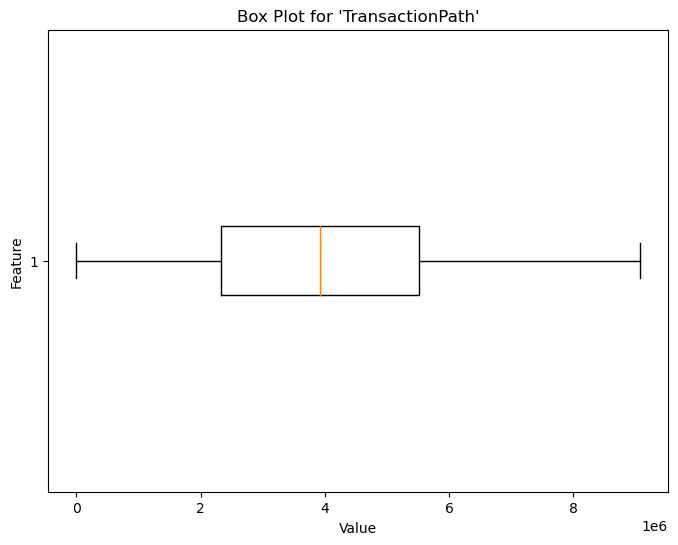

In [25]:
# Create a box plot for each numerical column in the dataset
for column in data.select_dtypes(include='number'):
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column], vert=False,)
    plt.title(f"Box Plot for '{column}'")
    plt.xlabel("Value")
    plt.ylabel("Feature")
    plt.show()

In [26]:


# Define a function to detect outliers using IQR
def detect_outliers(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers for each numerical column in the dataset
for column in data.select_dtypes(include='number'):
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':")
        print(outliers)


Outliers detected in column 'amount':
         type      amount  isFraud  isFlaggedFraud  Actual_amount_orig  \
85          4  1505626.01        0               0                0.00   
86          4   554026.99        0               0                0.00   
88          4   761507.39        0               0                0.00   
89          4  1429051.47        0               0                0.00   
93          4   583848.46        0               0                0.00   
...       ...         ...      ...             ...                 ...   
6362613     1  1258818.82        1               0          1258818.82   
6362616     4  6311409.28        1               0          6311409.28   
6362617     1  6311409.28        1               0          6311409.28   
6362618     4   850002.52        1               0           850002.52   
6362619     1   850002.52        1               0           850002.52   

         Actual_amount_dest  TransactionPath  
85              -5486732.3

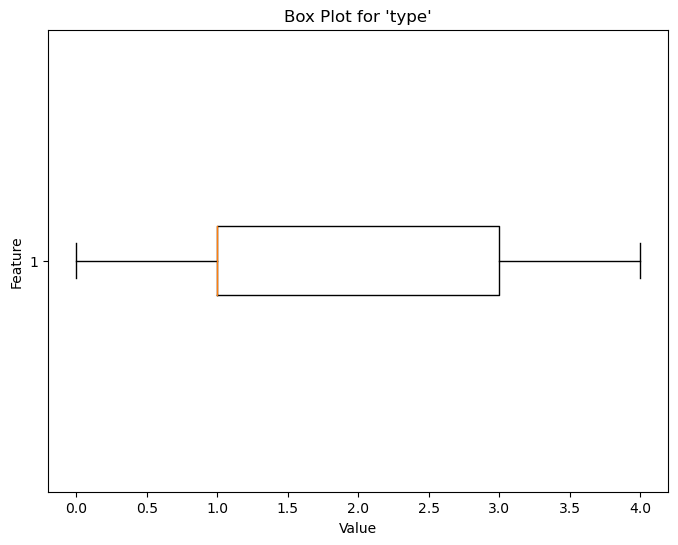

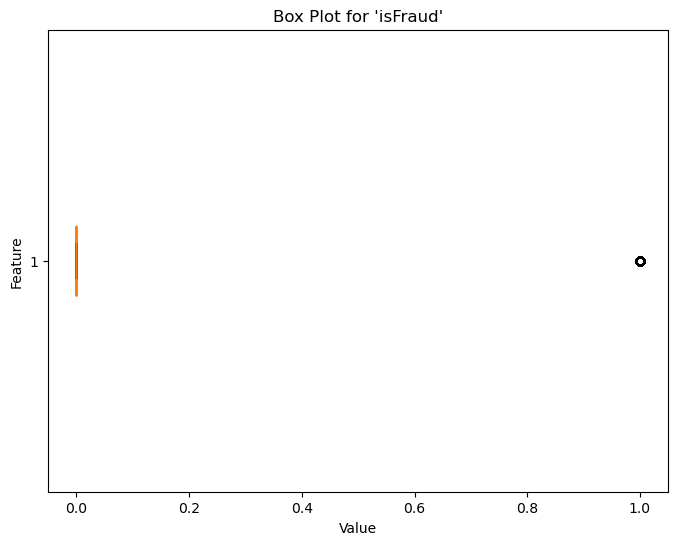

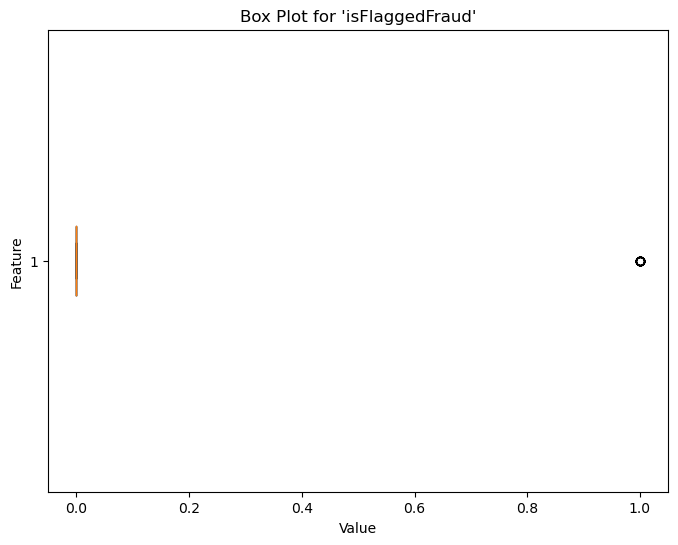

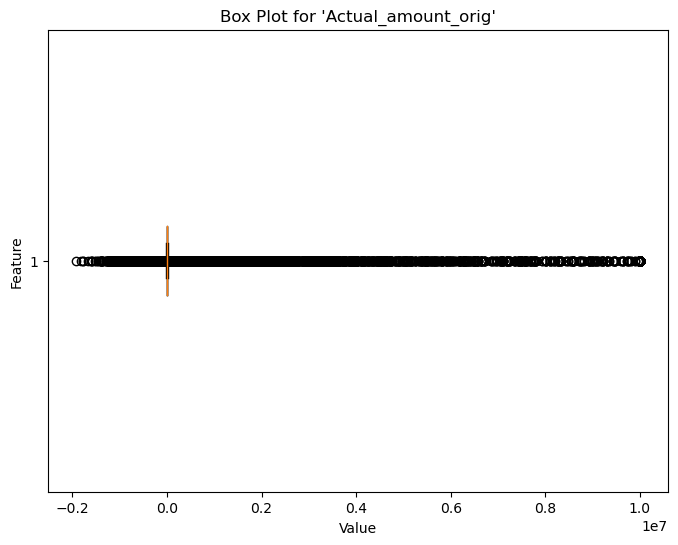

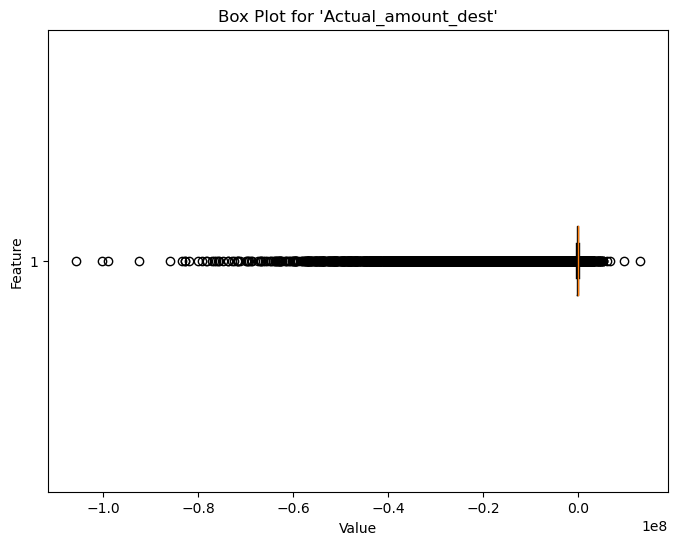

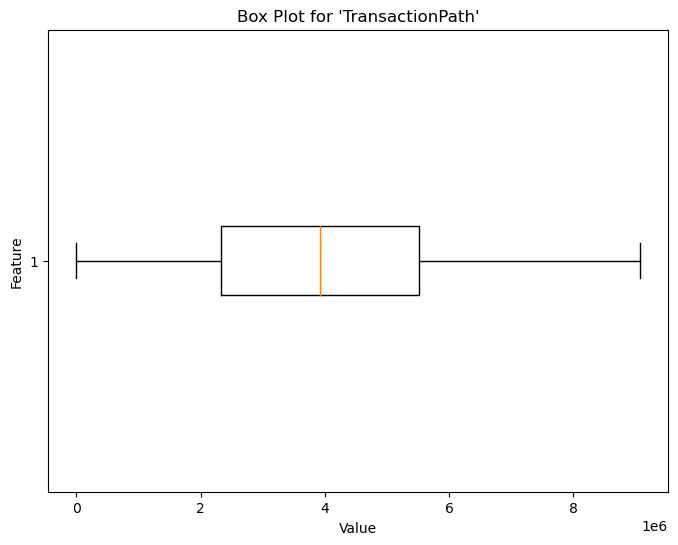

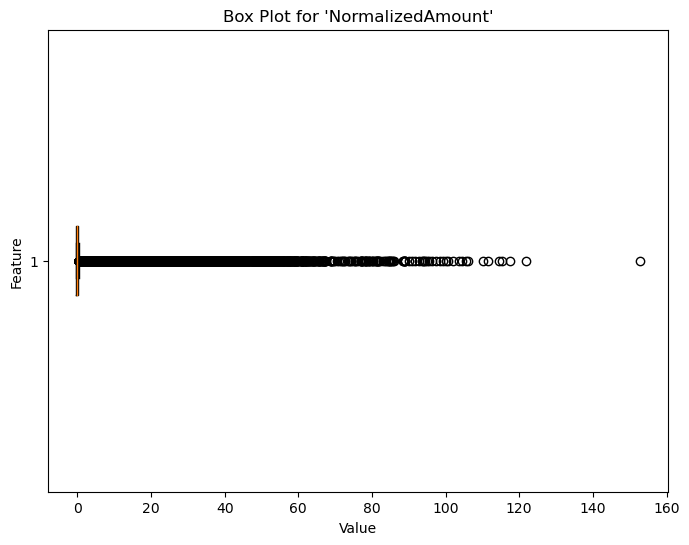

In [45]:
# Create a box plot for each numerical column in the dataset
for column in data.select_dtypes(include='number'):
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column], vert=False,)
    plt.title(f"Box Plot for '{column}'")
    plt.xlabel("Value")
    plt.ylabel("Feature")
    plt.show()

<h1 style="color:Indigo">Model Building</h1>

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

<h1 style="color:Indigo">Normalizing (SCALING) Amount</h1>

In [31]:
# Perform Scaling
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["amount"].values.reshape(-1, 1))
data.drop(["amount"], inplace= True, axis= 1)

Y = data["isFraud"]
X = data.drop(["isFraud"], axis= 1)

I did not normalize the complete dataset because it may lead to decrease in accuracy of model.

<h1 style="color:Indigo">Train-Test Split</h1>

In [32]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


<h1 style="color:Indigo">Model Training</h1>


In [33]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [34]:
 #RANDOM FOREST

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)


Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

<h1 style="color:Indigo">Evaluation</h1>

In [36]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92372115051137
Random Forest Score:  99.95876960539316


In [37]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1715
False Positives: 736
True Negatives: 1905615
False Negatives: 720
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1714
False Positives: 66
True Negatives: 1906285
False Negatives: 721



* TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
* FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
* TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
* FN(Decision Tree) ~ FN(Random Forest)

In [38]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



In [39]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected

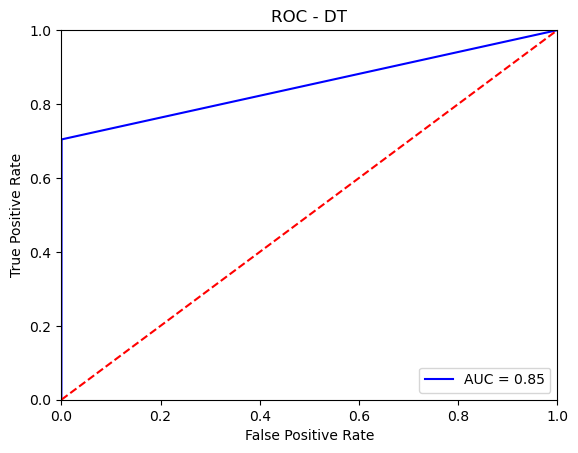

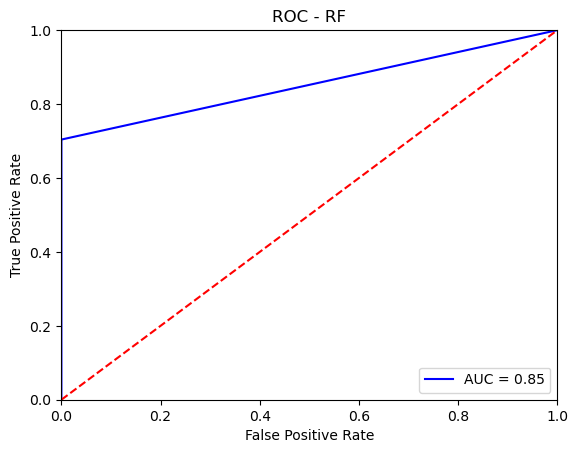

In [41]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h1 style="color:Indigo">Conclusion:</h1>

In this project, we developed a fraud detection model using the Random Forest algorithm to proactively identify fraudulent transactions in a financial company's dataset. The dataset contained 6,362,620 transactions with 10 attributes, including transaction type, amount, customer information, and the target label indicating whether a transaction is fraudulent or legitimate.



We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

<b>* What are the key factors that predict fraudulent customer?</b>

1. The source of request is secured or not ?
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.

<b>* What kind of prevention should be adopted while company update its infrastructure?</b>

1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

<b>* Assuming these actions have been implemented, how would you determine if they work?</b>

1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
3. Always keep a log of your payments.